In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

import pandas.io.sql as pd_sql
import sqlite3 as sql

Loading BokehJS ...

In [4]:
ls

ayuda.txt          Ejemplo01-Scipy.ipynb*       ejemplo-mundial-18-Copy1.ipynb
datos-tabula/      Ejemplo02-matematicas.ipynb  ejemplo-mundial-18.ipynb*
ejemplo-002.ipynb  Ejemplo03-json.ipynb


In [5]:
# data = pd.read_excel("datos-tabula/Listado-Instituciones-Educativas.xls", sheet_name="Zona 2")
nombres = [u'Codigo-AMIE', u'Nombre-Institucion',
       u'CDPA-Provincia', u'Provincia',
       u'CDPA-Canton', u'Canton',
       u'CDPA-Parroquia', u'Parroquia',
       u'Zona-Administrativa', u'Nombre-Distrito',
       u'Codigo-Distrito', u'Cod-Circuito-Educativo',
       u' Unidad-Administrativa-Circuital',
       u'Casos-excepcionales', u'Sostenimiento', u'Regimen-Escolar',
       u'Jurisdiccion', u'Tipo-Educacion', u'Modalidad', u'Jornada',
       u'Nivel', u'Etnia', u'Nacionalidad', u'Pueblo',
       u'Institucion-georeferenciada', u'Institucion-responsable',
       u'Tipo-Acceso', u'Numero-estudiantes',
       u'Numero-docentes', u'Estado']
lista = ["Zona1", "Zona 2", "Zona 3", "Zona 4", "Zona 5", "Zona 6", "Zona 7", "Zona 8", "Zona 9", "Zona no delimitada"]
lista_df = []
for d in lista:
    data = pd.read_excel("../archivos/Listado-Instituciones-Educativas.xls", sheet_name=d, header=None, names=nombres, skiprows=1)
    lista_df.append(data)
    
data_final = pd.concat(lista_df)

In [6]:
print data_final.keys()

Index([u'Codigo-AMIE', u'Nombre-Institucion', u'CDPA-Provincia', u'Provincia',
       u'CDPA-Canton', u'Canton', u'CDPA-Parroquia', u'Parroquia',
       u'Zona-Administrativa', u'Nombre-Distrito', u'Codigo-Distrito',
       u'Cod-Circuito-Educativo', u' Unidad-Administrativa-Circuital',
       u'Casos-excepcionales', u'Sostenimiento', u'Regimen-Escolar',
       u'Jurisdiccion', u'Tipo-Educacion', u'Modalidad', u'Jornada', u'Nivel',
       u'Etnia', u'Nacionalidad', u'Pueblo', u'Institucion-georeferenciada',
       u'Institucion-responsable', u'Tipo-Acceso', u'Numero-estudiantes',
       u'Numero-docentes', u'Estado'],
      dtype='object')


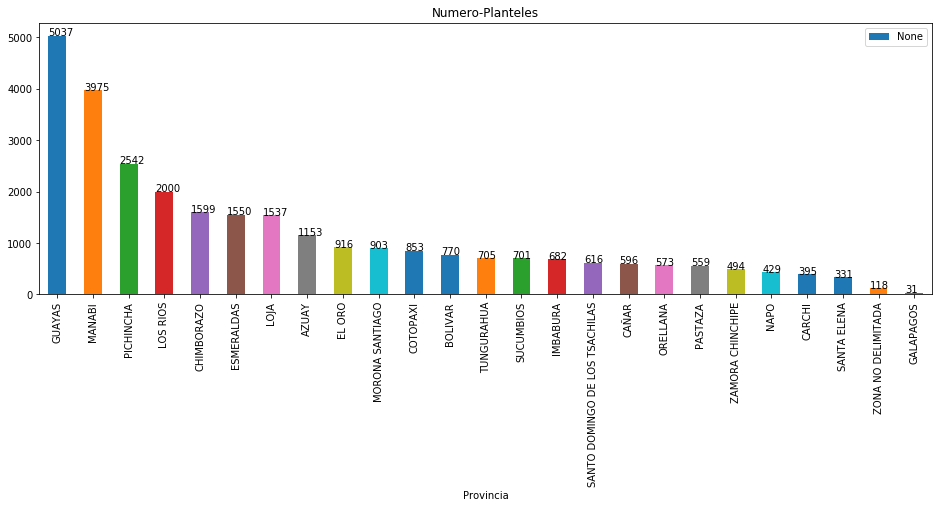

In [7]:
ax = data_final.groupby(['Provincia']).size()\
.sort_values(ascending=False)[:26]\
.plot.bar(title = u'Numero-Planteles', legend=True, figsize=(16,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

In [75]:
data_final.Provincia.unique()

array([u'CARCHI', u'ESMERALDAS', u'IMBABURA', u'PICHINCHA', u'SUCUMBIOS',
       u'NAPO', u'ORELLANA', u'CHIMBORAZO', u'COTOPAXI', u'PASTAZA',
       u'TUNGURAHUA', u'MANABI', u'SANTO DOMINGO DE LOS TSACHILAS',
       u'BOLIVAR', u'GALAPAGOS', u'GUAYAS', u'LOS RIOS', u'SANTA ELENA',
       u'AZUAY', u'CA\xd1AR', u'MORONA SANTIAGO', u'EL ORO', u'LOJA',
       u'ZAMORA CHINCHIPE', u'ZONA NO DELIMITADA'], dtype=object)

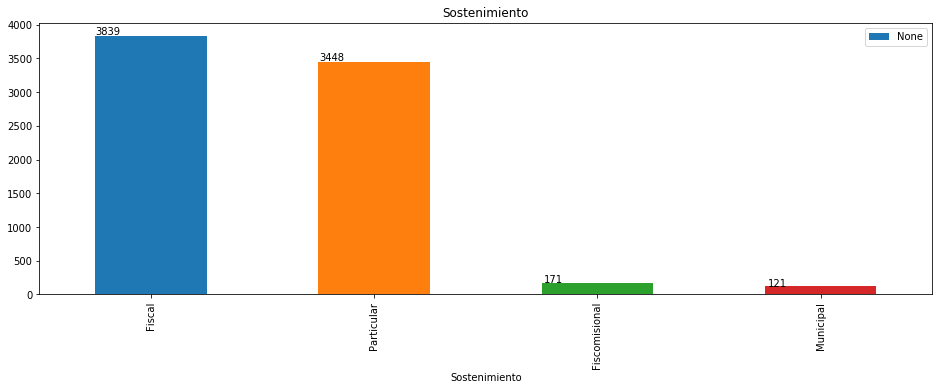

In [76]:
ax = data_final[(data_final['Provincia']=='GUAYAS') | (data_final['Provincia']=='PICHINCHA')].groupby(['Sostenimiento']).size()\
.sort_values(ascending=False)\
.plot.bar(title = u'Sostenimiento', legend=True, figsize=(16,5))

for p in ax.patches:
    # print p.get_x()
    # width, height = p.get_width(), p.get_height()
    # x, y = p.get_xy() 
    # print x, y
    # ax.annotate('{:.0f} %'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    # ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))